In [1]:
import matplotlib.pyplot as plt
%matplotlib inline # see the plots inside jupyter notebook

UsageError: unrecognized arguments: # see the plots inside jupyter notebook


In [2]:
# General:
import pandas as pd     # To handle data
import numpy as np      # For numerical computation
# For plotting and visualization:
from IPython.display import display
import pyodbc

In [3]:
conn = pyodbc.connect(driver='{SQL Server}',
                     host='LAPTOP-V2T8356G',
                     database='gather_eskom',
                     trusted_connection='tcon',
                     user='LAPTOP-V2T8356G\mojel')

In [4]:
df_stations = pd.read_sql_query('select * from dbo.station',conn)
df_stations.head()

,station_id,station_type_id,total_installed_capacity,total_nominal_capacity,location
0,1,1,2352,2232,Middelburg
1,2,1,1561,1481,Ermelo
2,3,1,3000,2875,Emalahleni
3,4,1,1180,570,Balfour
4,5,1,1728,1293,Middelburg


In [5]:
import seaborn as sns

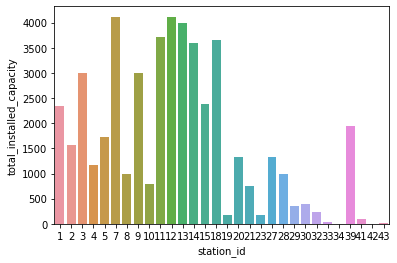

In [7]:
#total installed capacity vs station ID
sns.barplot(x='station_id', y='total_installed_capacity',data=df_stations)

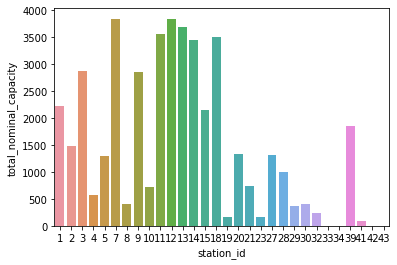

In [8]:
#total nominal capacity vs station ID
sns.barplot(x='station_id', y='total_nominal_capacity',data=df_stations)

# The averages of each type of station

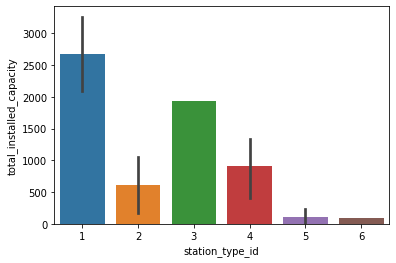

In [11]:

sns.barplot(x='station_type_id', y='total_installed_capacity',data=df_stations, estimator = np.mean)

In [12]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
df_population = pd.read_sql_query('select * from dbo.population',conn)
df_population.head()

,year,population_size
0,2002,46355082.53
1,2003,46806354.46
2,2004,47310049.83
3,2005,47860359.76
4,2006,48446414.03


In [14]:
df_population.iplot(kind = 'scatter', x='year',y='population_size',title='SA population(2002-2019)',xTitle='Year',yTitle='Population Size')

In [15]:
df_electrification = pd.read_sql_query('select * from dbo.electrification',conn)
df_electrification.head()

,province_id,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,1,28365,26303,11976,33515,16218,17890,4682,21195,17331,23762,17422,12578
1,2,48429,38685,28532,34027,21450,25775,4639,18856,8504,14303,18168,8981
2,3,39660,36024,32127,39488,18422,23532,8842,37416,16156,18730,19261,25275
3,4,48429,38685,28532,34027,21450,25775,4639,11608,12141,17249,15676,10856
4,6,6168,10359,6869,10976,6316,7152,3528,5431,1697,4085,5836,5095


In [16]:
df_elect=df_electrification[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]

In [17]:
df_elect

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,28365,26303,11976,33515,16218,17890,4682,21195,17331,23762,17422,12578
1,48429,38685,28532,34027,21450,25775,4639,18856,8504,14303,18168,8981
2,39660,36024,32127,39488,18422,23532,8842,37416,16156,18730,19261,25275
3,48429,38685,28532,34027,21450,25775,4639,11608,12141,17249,15676,10856
4,6168,10359,6869,10976,6316,7152,3528,5431,1697,4085,5836,5095
5,21293,20928,10316,16135,5668,7301,4205,10635,6292,16769,10582,4806
6,63413,64123,63078,60282,37811,36501,33184,43971,29253,43396,28748,22079
7,51860,68121,49881,42034,54646,60316,18592,46036,35828,35198,36772,29980


In [21]:
df_elect.iplot(kind='box',title='Five number summary for electrification(2000-2011)',xTitle='Year',yTitle='Total number of electrified households')